# **2 - Visualization: Assemblage Clustering**

In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
import pandas as pd

from shapely.geometry import Point
from pathlib import Path

## Read Data

##### Project main path

In [2]:
# Change path so that it points to  were data is located
pth = Path(r'../data')
pth 

WindowsPath('../data')

### Read Geographic information 

##### Read rasters

In [3]:
fn = pth / 'geography' / 'multi_hillshade.tif'
hs = rio.open(fn)
fn

WindowsPath('../data/geography/multi_hillshade.tif')

##### Read surveyed fields

In [4]:
fn = pth / 'fields' / 'fields14_18.shp'
fields = gpd.read_file(fn, encoding ='utf-8')
fields.tail(2)

,MASA,PARCELA,SUBPARCE,TIPO,AREA,REFCAT,TIPOSUBP,CC,DENOMINA,REGADIO,...,Yr2014,Yr2015,2014status,2015status,Yr2016,2016status,Visited,Status,area_ha,geometry
327,016,00125,0,R,11113,07062A01600125,T,AM,Almendro secano,None,...,0,0,None,None,1,Done,None,None,1.11,"POLYGON Z ((530726.213 4388450.906 0.000, 5307..."
328,010,00144,0,R,14717,07062A01000144,T,C-,Labor o Labradío secano,None,...,0,0,None,None,0,None,None,None,1.47,"POLYGON Z ((529948.730 4387913.155 0.000, 5298..."


##### Read Torrents

In [5]:
fn = pth / 'geography' / 'torrentes.shp'
torrents = gpd.read_file(fn, encoding ='utf-8')
torrents.tail(2)

,OBJECTID,gid,fecha,version,id_curso,id_nom_geo,nombre,id_enlace,id_demarc,drainsbasi,...,ancho_min,marea,delineatio,longitud,resolucion,fuente,origen_z,inspireid_,Shape_Leng,geometry
7,8,3460084,2019-04-28,0,207536,0,Torrent de Xiclatí,0,ES110,None,...,1,0,1,7572.69,5,5001,4002,ES110HYWCSL0000003460084,664.030925,"LINESTRING Z (529649.501 4389234.994 98.600, 5..."
8,9,3458188,2019-04-28,0,207546,0,None,0,ES110,None,...,1,0,1,7274.03,5,5001,4002,ES110HYWCSL0000003458188,1212.757403,"LINESTRING Z (528702.500 4386258.404 135.429, ..."


##### Read Archaeological Sites

In [6]:
fn = pth / 'sites' / 'sites.xlsx'
sites_tmp = pd.read_excel(fn)

In [7]:
sites = sites_tmp.copy()
sites['geometry'] = sites.apply(lambda pt: Point(pt.easting, pt.northing), axis = 1)
sites = gpd.GeoDataFrame(sites)

##### Read *Clustered* Grids

In [8]:
fn = pth / 'clustered' / 'assemblage' / 'grid' / 'cluster_grid80.shp'
fn

WindowsPath('../data/clustered/assemblage/grid/cluster_grid80.shp')

In [9]:
grid = gpd.read_file(fn, encoding= 'utf-8')
grid = grid.drop(columns='id')
grid.head(2)

,grid80,Biclst,geometry
0,2,4,"POLYGON ((532126.615 4385295.031, 532126.615 4..."
1,11,0,"POLYGON ((531806.615 4385535.031, 531806.615 4..."


### Read Balearic survey data by grid (80x80m)
The following files contains the total weight of Balearic pottery production found within each grid cell

In [10]:
# read productions
fn = pth / 'artifacts' / 'by_grid'/ 'grid80_productions.txt'
grid_prods = pd.read_csv(fn)
grid_prods.head(3)

,grid80,AtBlckGlz,Balearic,CamBlckGlzA,CamBlckGlzB,CmedPuAm,EbBlckGlz,EbPuAm,EbPuCom,GrItAm,IbAm,IbCom,ItAm,ItCom,MasAm,PuAm,PuCom,SoItVesCaAm
0,2,0.0,8.4,0.0,0.0,0.0,0.0,45.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,0.0,0.0,0.0,0.0,0.0,0.0,38.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Plots

##### Generate Color palette

In [11]:
n = grid.Biclst.nunique()
color = sns.color_palette('Set1', n_colors= n)
color = [list(c) for c in color]

### Plot map

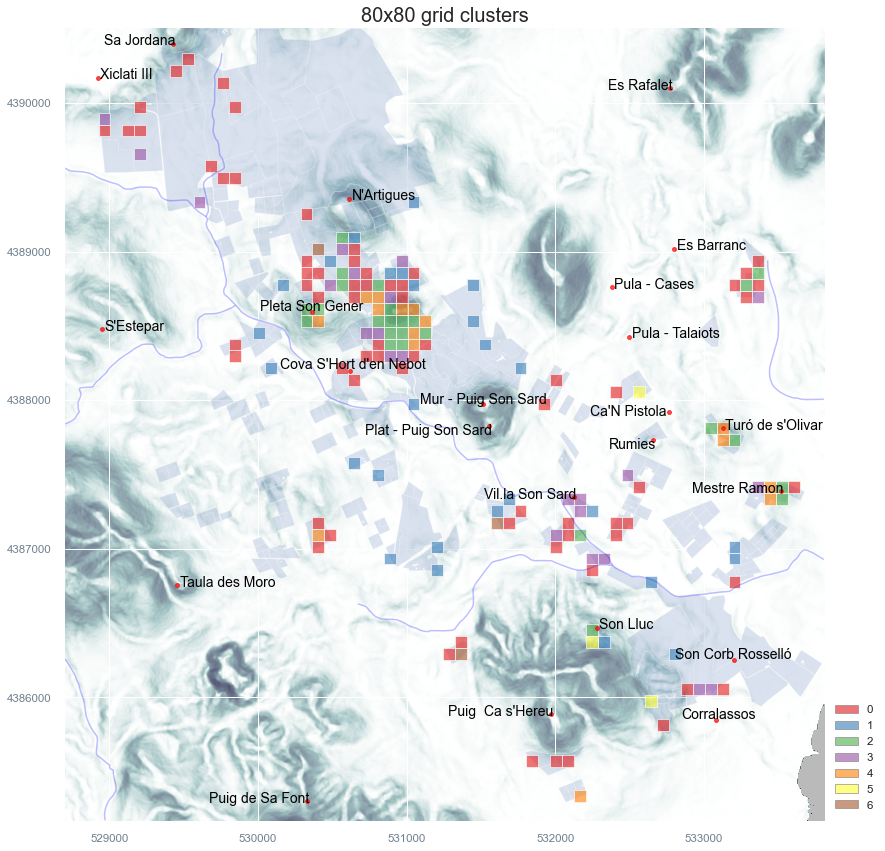

In [12]:
from leiap_survey.utils import plot_raster

mpl.style.use('seaborn')
sns.set(font_scale = 1.05)

# set up annotation data
data_lbls = zip(sites.name, sites.easting, sites.northing, sites.offx, sites.offy, sites.ha, sites.va )

# define figure and size
fig, ax = plt.subplots(figsize= (12, 12))

# background terrain
plot_raster(hs, colors="bone", ax= ax, nodata_color={'color': 'k', 'alpha': 0.30}, title= '80x80 grid clusters')
torrents.plot(ax=ax, edgecolor='blue', alpha= 0.25)
fields.plot(ax= ax, edgecolor= 'white', alpha= 0.2)

#plot every cluster
for clstr, data in grid.groupby('Biclst'):
    data.plot(ax = ax, color= color[clstr], alpha= 0.6)

# loop through annotations
for text, x, y, offx, offy, ha, va in data_lbls:
    ax.annotate(text, xy=(x,y), xytext= (offx, offy), ha=ha, va=va, color='black', textcoords='offset points', fontsize= 14)

# plot archaeological sites
sites.plot(ax=ax, markersize= 15, color='red', alpha=0.7)

# create legend for polygon grid
pmarks =[]
for i, c in enumerate(color):
    pmarks += [mpl.patches.Patch(color= c, ec= 'grey', label= i, fill= True, alpha= 0.6)]

# move legend
ax.legend(handles=pmarks, bbox_to_anchor=(1,0), loc= 'lower left')

plt.tight_layout()

# Uncomment to save figure
#plt.savefig(pth /'output'/ 'grid80_clustered.png' dpi= 300)

plt.show()

### Display Cluster content

In [13]:
from leiap_survey.cluster import cluster_profile

#### Generate Production to Type Mapping
Used to map original ceramic productions into ceramic types

In [14]:
type_map = {
 'AtBlckGlz': 'Fineware',
 'Balearic': 'Coarseware',
 'CamBlckGlzA': 'Fineware',
 'CamBlckGlzB': 'Fineware',
 'CmedPuAm':  'Amphora',
 'EbBlckGlz': 'Fineware',
 'EbPuAm':  'Amphora',
 'EbPuCom': 'Commonware',
 'GrItAm':  'Amphora',
 'IbAm':  'Amphora',
 'IbCom': 'Commonware',
 'ItAm':  'Amphora',
 'ItCom': 'Commonware',
 'MasAm': 'Amphora',
 'PuAm': 'Amphora',
 'PuCom':'Commonware',
 'SoItVesCaAm': 'Amphora'
}

Select the cluster for which you want to display the content

In [15]:
cluster = 1
sel = grid['Biclst']== cluster

Display ceramic types

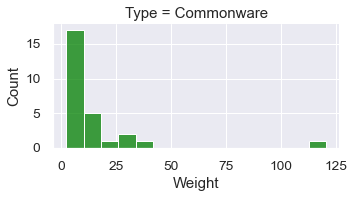

In [16]:
sns.set(font_scale = 1.25)
lbls= ['Type', 'Weight']
ax = cluster_profile(grid_prods.iloc[:,1:], sel.values, lbls, opt='map', map_dict=type_map)

# Uncomment to save
fn = pth /'output'/ 'cluster_1_grid80_types.png'
#plt.savefig(fn, dpi=300)


Display content by original ceramic production

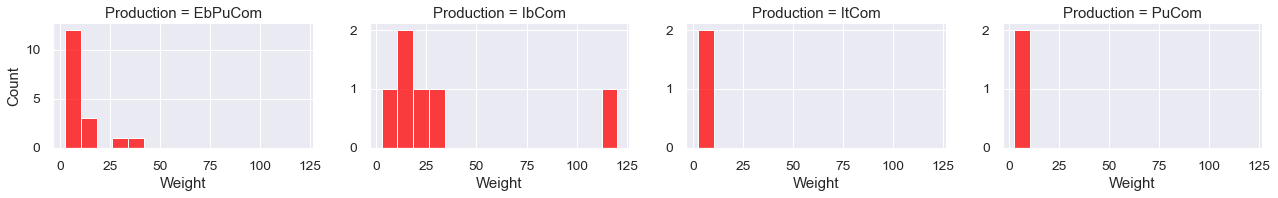

In [17]:
sns.set(font_scale = 1.25)
lbls= ['Production', 'Weight']
ax = cluster_profile(grid_prods.iloc[:,1:], sel.values, lbls, opt='raw')

# Uncomment to save
fn = pth /'output'/ 'cluster_1_grid80_productions.png'
#plt.savefig(fn, dpi=300)